In [13]:
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")


In [14]:
ds = ds['train']

In [15]:
ds

Dataset({
    features: ['sentiment', 'comment'],
    num_rows: 1500
})

In [37]:
ds[0:5]

{'sentiment': ['not nostalgia',
  'nostalgia',
  'nostalgia',
  'not nostalgia',
  'nostalgia'],
 'comment': ['He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.',
  'The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel',
  'I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.',
  '30 day leave from 1st tour in Viet Nam to convince my Mary Lou to "marry me" when I

In [16]:
# check the type of the dataset
print(type(ds))

<class 'datasets.arrow_dataset.Dataset'>


In [38]:
len(ds)

1500

In [54]:
import pandas as pd
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(ds, columns= ['comment'])
X[0:5]


comment
0  He was a singer with a golden voice that I lov...
1  The mist beautiful voice ever I listened to hi...
2  I have most of Mr. Reeves songs.  Always love ...
3  30 day leave from 1st tour in Viet Nam to conv...
4  listening to his songs reminds me of my mum wh...

In [55]:
target = pd.DataFrame.from_records(ds, columns= ['sentiment'])
target[0:5]

sentiment
0  not nostalgia
1      nostalgia
2      nostalgia
3  not nostalgia
4      nostalgia

In [56]:
# add category to the dataframe
X['sentiment'] = target['sentiment']
X[0:5]


comment      sentiment
0  He was a singer with a golden voice that I lov...  not nostalgia
1  The mist beautiful voice ever I listened to hi...      nostalgia
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia
4  listening to his songs reminds me of my mum wh...      nostalgia

In [57]:
X['category'] = X['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)
X[0:5]

comment      sentiment  category
0  He was a singer with a golden voice that I lov...  not nostalgia         0
1  The mist beautiful voice ever I listened to hi...      nostalgia         1
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia         1
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia         0
4  listening to his songs reminds me of my mum wh...      nostalgia         1

In [61]:
X.iloc[10:20]

comment      sentiment  category
10  ill bet if they begin to play this song on the...  not nostalgia         0
11  this song came out my senior year in high scho...      nostalgia         1
12  A few years back picked up at a charity shop a...      nostalgia         1
13  I am 47 and grew up on songs of this type.  I ...      nostalgia         1
14  I remember my father used to listen to Jim Ree...  not nostalgia         0
15  This song/singer has very special meaning as i...  not nostalgia         0
16  Sir. Jim Reeves!! I love him. I'm 29 years old...  not nostalgia         0
17  It is a memory lane, I grew up listening to Ji...      nostalgia         1
18  My Grandparents had a pub in the 1970's, this ...      nostalgia         1
19  A fine tune from Gentleman Jim. The tunes on m...      nostalgia         1

In [58]:
print(X[X['sentiment']=='nostalgia'].iloc[::10])

                                                comment  sentiment  category
1     The mist beautiful voice ever I listened to hi...  nostalgia         1
18    My Grandparents had a pub in the 1970's, this ...  nostalgia         1
32    I remember my Mom listening to Jim over and ov...  nostalgia         1
50    If I remember correctly, this song came out af...  nostalgia         1
71    Gosh does this bring back memories. Nearly eve...  nostalgia         1
...                                                 ...        ...       ...
1406  The skating rink! Ah... Good times! Brings bac...  nostalgia         1
1423  I love you more than I can say. It's the words...  nostalgia         1
1439  January 2019...I remember sitting in the back ...  nostalgia         1
1456  Brings sweet memories to  mind. Warms my heart...  nostalgia         1
1478         love this song bring back good memories...  nostalgia         1

[75 rows x 3 columns]


In [62]:
X.isnull()

comment  sentiment  category
0       False      False     False
1       False      False     False
2       False      False     False
3       False      False     False
4       False      False     False
...       ...        ...       ...
1495    False      False     False
1496    False      False     False
1497    False      False     False
1498    False      False     False
1499    False      False     False

[1500 rows x 3 columns]

In [63]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [64]:
dummy_series = pd.Series(["dummy_record", 1], index=["comment", "category"])

In [65]:
dummy_series

comment     dummy_record
category               1
dtype: object

In [66]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [68]:
len(result_with_series)

1501

In [69]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

comment                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   1   

                             category  
0  The amoung of missing records is:   
1                                   0

In [70]:
dummy_dict = [{'comment': 'dummy_record',
               'category': 1
              }]

In [71]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [72]:
len(X)

1501

In [73]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

comment                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   1   

                             category  
0  The amoung of missing records is:   
1                                   0

In [74]:
X.dropna(inplace=True)

In [75]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

comment                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             category  
0  The amoung of missing records is:   
1                                   0

In [76]:
len(X)

1500

In [77]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [81]:
sum(X.duplicated())

1

In [80]:
sum(X.duplicated('comment'))

1

In [82]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [83]:
len(X)

1498

In [107]:
X_sample = X.sample(n=800) 

In [108]:
len(X_sample)

800

In [109]:
X_sample[0:4]

comment      sentiment  \
640   hello  ,  gorgeous woman and  a  fantastic  vo...  not nostalgia   
658                 Everything fades when love departs.  not nostalgia   
1290                 I wish these days were back again!      nostalgia   
1186  Love this tune! Stopped in a gas station yeste...  not nostalgia   

      category  
640          0  
658          0  
1290         1  
1186         0

sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

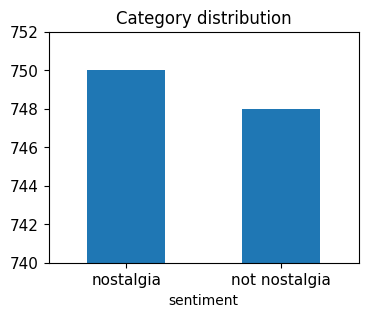

In [110]:
print(X.sentiment.value_counts())

X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [740, 752],        
                                    rot = 0, fontsize = 11, figsize = (4,3))

sentiment
not nostalgia    410
nostalgia        390
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

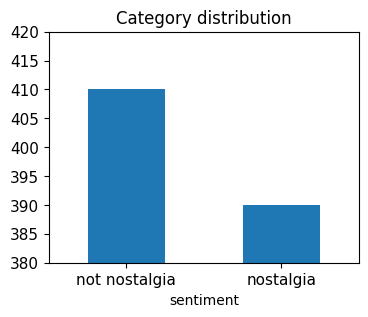

In [113]:
print(X_sample.sentiment.value_counts())

X_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [380, 420],        
                                    rot = 0, fontsize = 11, figsize = (4,3))

In [115]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


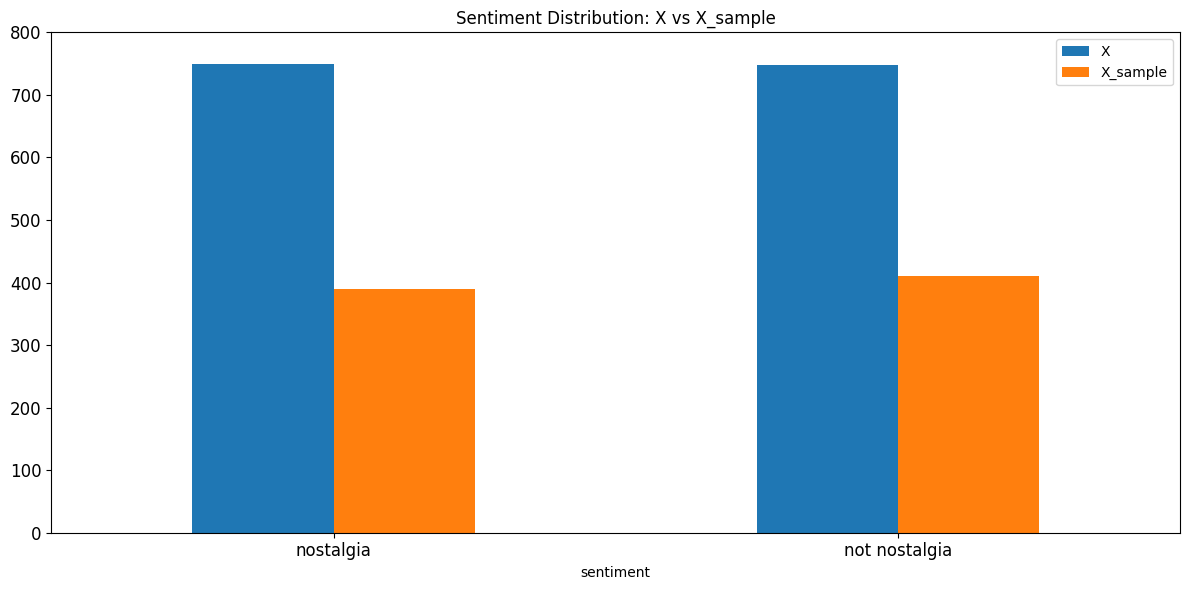

In [118]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt


X_sentiment_counts = X.sentiment.value_counts()
X_sample_sentiment_counts = X_sample.sentiment.value_counts()


df_combined = pd.DataFrame({'X': X_sentiment_counts, 'X_sample': X_sample_sentiment_counts})
df_combined = df_combined.fillna(0)
plt.style.use('_classic_test_patch')

df_combined.plot(kind='bar', 
                 figsize=(12, 6), 
                 rot=0, 
                 fontsize=12, 
                 title='Sentiment Distribution: X vs X_sample')

plt.ylim([0, max(max(X_sentiment_counts), max(X_sample_sentiment_counts)) + 50])
plt.tight_layout()
plt.show()

In [119]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [120]:
# takes a like a minute or two to process
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [121]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [122]:
X[0:4]

comment      sentiment  category  \
0  He was a singer with a golden voice that I lov...  not nostalgia         0   
1  The mist beautiful voice ever I listened to hi...      nostalgia         1   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia         1   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia         0   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [123]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

In [125]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) 
print(X_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [127]:
count_vect.get_feature_names_out()[200]

'affair'

In [128]:
count_vect.get_feature_names_out()[1500]

'grandfather'

In [129]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [130]:
X_counts.shape

(1498, 3730)

In [131]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [132]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [134]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [135]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [136]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

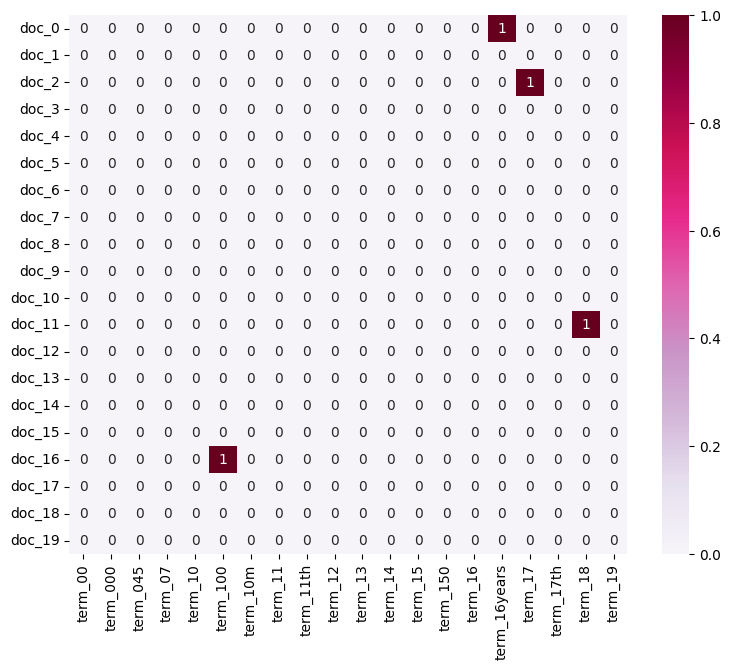

In [137]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [138]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [140]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [141]:
term_frequencies[0] #sum of first term: 00

np.int64(1)

C:\Users\Lin\AppData\Local\Temp\ipykernel_13616\3140323867.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

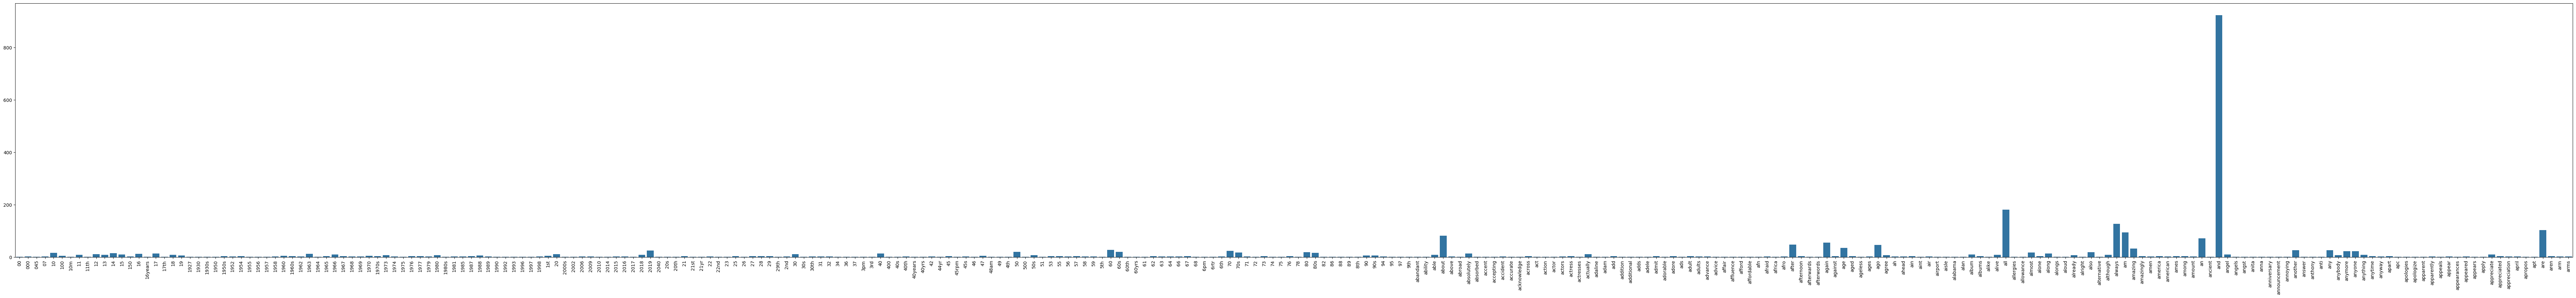

In [142]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [143]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    'x': count_vect.get_feature_names_out()[:300],
    'y': term_frequencies[:300]
})

fig = px.bar(df, x='x', y='y')
fig.update_layout(xaxis_tickangle=90)  
fig.show()

C:\Users\Lin\AppData\Local\Temp\ipykernel_13616\2751343142.py:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



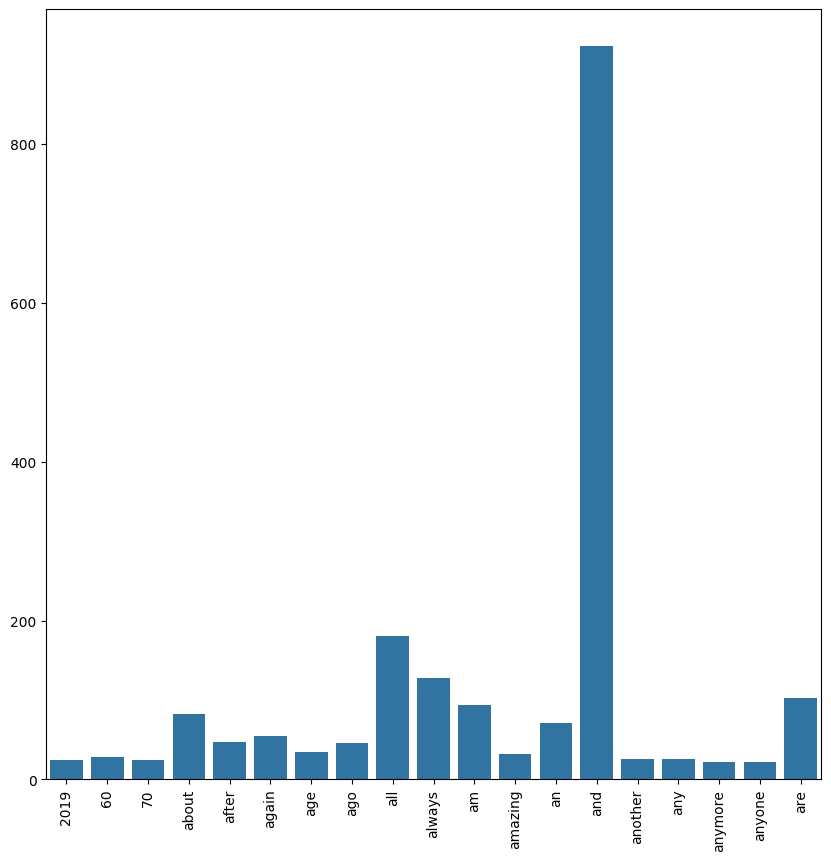

In [146]:

filtered_features = count_vect.get_feature_names_out()[:300]
filtered_frequencies = term_frequencies[:300]

k = 20
filtered_features = [feature for feature, freq in zip(filtered_features, filtered_frequencies) if freq > k]
filtered_frequencies = [freq for freq in filtered_frequencies if freq > k]

plt.subplots(figsize=(10, 10))
g = sns.barplot(x=filtered_features, y=filtered_frequencies)
g.set_xticklabels(filtered_features, rotation=90)
plt.show()

C:\Users\Lin\AppData\Local\Temp\ipykernel_13616\3936148531.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



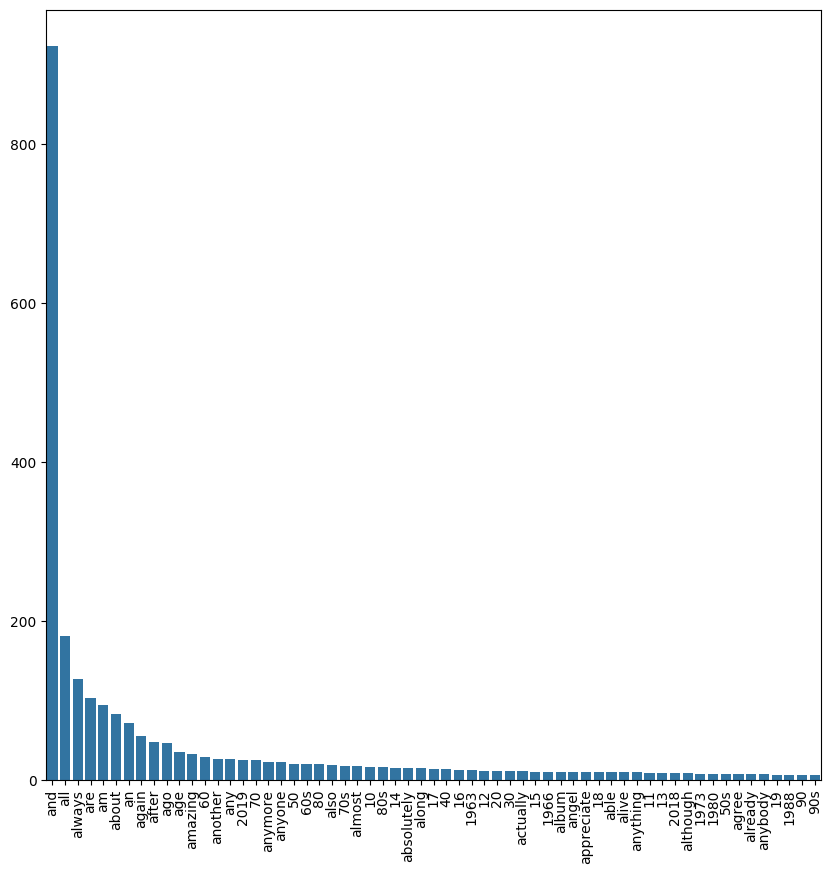

In [147]:
filtered_features = count_vect.get_feature_names_out()[:300]
filtered_frequencies = term_frequencies[:300]
k = 5
filtered_data = [(feature, freq) for feature, freq in zip(filtered_features, filtered_frequencies) if freq > k]

filtered_data.sort(key=lambda x: x[1], reverse=True)
filtered_features_sorted, filtered_frequencies_sorted = zip(*filtered_data)

plt.subplots(figsize=(10, 10))
g = sns.barplot(x=filtered_features_sorted, y=filtered_frequencies_sorted)
g.set_xticklabels(filtered_features_sorted, rotation=90)
plt.show()


In [148]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\Lin\AppData\Local\Temp\ipykernel_13616\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



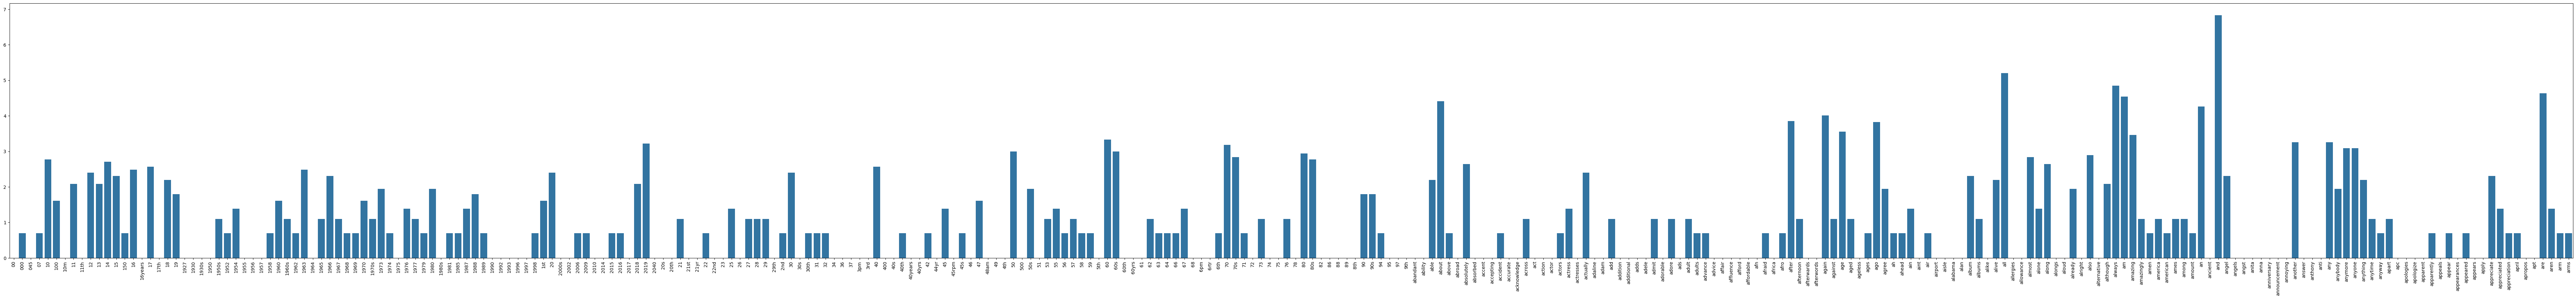

In [149]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [150]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

categories = X['sentiment'].unique()  
category_dfs = {}  

for category in categories:
    category_dfs[category] = X[X['sentiment'] == category].copy()

def create_term_document_df(df):
    count_vect = CountVectorizer()  
    X_counts = count_vect.fit_transform(df['comment'])  
    
    words = count_vect.get_feature_names_out()
    
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

filt_term_document_dfs = {}  

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [154]:
category_number=1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  \
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   
745   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
746   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
747   0   0   0     0   0   1   0   0   0   0  ...      0        0          0   
748   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
749   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   

     your  yours  youth  youthful  youtube  yrs  yup  
0       0      0      0         0        0    0    0  
1       0      0      0         0        0    0    0  
2       0      0      0         0        0    0    0  
3       1      0      0         0        0    0    0  
4       0      0      0         0        0    0    0  
..    ...    ...    ...       ...      ...  ...  ...  
745     0      0      0         0        0    0    1  
746     0      0      0         0        0    0    0  
747     0      0      0         0        0    0    0  
748     0      0      0         0        0    0    0  
749     0      0      0         0        0    0    0  

[750 rows x 2295 columns]

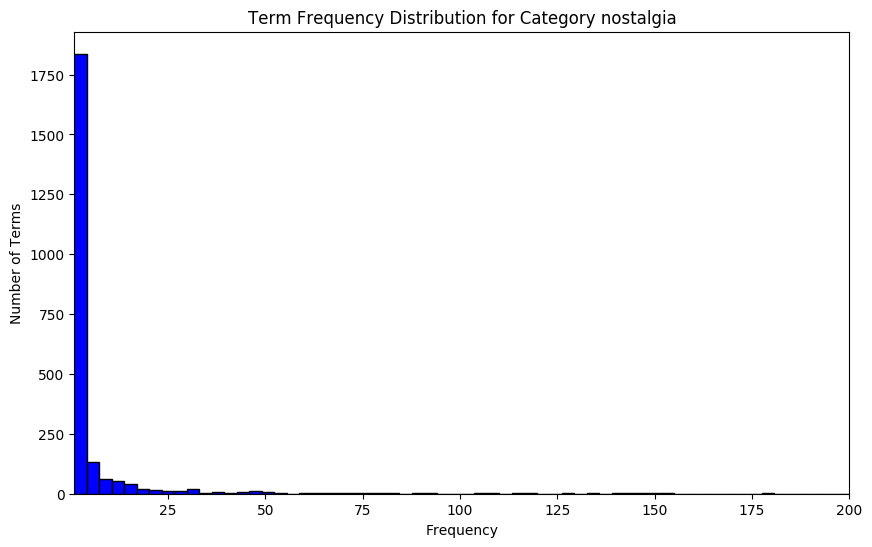

In [160]:
category_number=1 
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=200, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [163]:
category_number=1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

sorted_indices = np.argsort(word_counts)[::-1] 
sorted_counts = np.sort(word_counts)[::-1]  

total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

top_5_percent_indices = sorted_indices[:top_5_percent_index]

filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'that', 'on', 'love', 'for', 'time', 'you', 'remember', 'old', 'with', 'is', 'music', 'great', 'brings', 'we', 'beautiful', 'as', 'all', 'now', 'but', 'days', 'at', 'good', 'miss', 'songs', 'childhood', 'reminds', 'her', 'from', 'still', 'just', 'he', 'always', 'have', 'she', 'first', 'dad', 'had', 'many', 'much', 'listening', 'his', 'up', 'like', 'loved', 'used', 'school', 'were', 'am', 'those', 'one', 'very', 'voice', 'be', 'him', 'every', 'times', 'never', 'these', 'heard', 'can', 'listen', 'not', 'young', 'what', 'played', 'best', 'they', 'are', 'hear', 'out', 'sing', 'thank', 'life', 'how', 'happy', 'then', 'thanks', 'radio', 'again', 'ago', 'really', 'mum', 'play', 'day', 'an', 'who', 'mom', 'some', 'our', 'there', 'singing', 'wonderful', 'after', 'makes', 'came', 'passed', 'will', 'little']


In [164]:
sorted_counts

array([643, 566, 545, ...,   1,   1,   1])

In [165]:
sorted_indices

array([2011, 1403, 2026, ..., 2279, 2281, 2282])

In [166]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) 

np.int64(643)

In [167]:
category_number=1 
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

sorted_indices = np.argsort(word_counts)  
sorted_counts = word_counts[sorted_indices]  

total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['yo', 'yet', 'yester', 'yeas', 'yearn', 'yeah', '1952', '1950', '1969', '1964', 'lp', 'safety', 'safer', 'saddest', 'seeing', 'lou', 'proud', 'protest', '2002', 'yup', '1927', '11th']


In [168]:
sorted_counts

array([  1,   1,   1, ..., 545, 566, 643])

In [169]:
sorted_indices

array([2282, 2281, 2279, ..., 2026, 1403, 2011])

In [170]:
category_number=1

def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0)
    
    sorted_words = word_sums.sort_values()
    
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') 
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') 
    return term_document_df.drop(columns=words_to_remove)

term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
12           1
16years      1
zealand      1
sensitive    1
sense        1
xd           1
wwii         1
wuv          1
writers      1
writer       1
wrenching    1
wouldn       1
1998         1
measure      1
spine        1
spewing      1
2040         1
2018         1
2017         1
2010         1
1957         1
1955         1
1952         1
1930s        1
1930         1
17th         1
dtype: int64
Top 5.0% words: 
first       23
got         23
classic     23
wish        24
any         25
          ... 
of         361
to         394
this       451
and        451
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yo         1
yet        1
yester     1
yeas       1
yearn      1
yeah       1
1952       1
1950       1
1969       1
1964       1
lp         1
safety     1
safer      1
saddest    1
seeing     1
lou        1
proud      1
protest    1
2

07  10  11  12  13  14  15  16  17  18  ...  yesterday  yokel  younger  \
0     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
1     0   0   0   0   0   0   0   0   1   0  ...          0      0        0   
2     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
3     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
4     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...        ...    ...      ...   
745   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
746   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
747   0   0   0   0   1   0   0   0   0   0  ...          0      0        0   
748   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
749   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   

     youngster  your  yours  youth  youthful  youtube  yrs  
0            0     0      0      0         0        0    0  
1            0     0      0      0         0        0    0  
2            0     0      0      0         0        0    0  
3            0     1      0      0         0        0    0  
4            0     0      0      0         0        0    0  
..         ...   ...    ...    ...       ...      ...  ...  
745          0     0      0      0         0        0    0  
746          0     0      0      0         0        0    0  
747          0     0      0      0         0        0    0  
748          0     0      0      0         0        0    0  
749          0     0      0      0         0        0    0  

[750 rows x 2159 columns]

In [171]:
from PAMI.extras.DF2DB import DenseFormatDF as db

for category in term_document_dfs:
    category_safe = category.replace('.', '_')
    
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


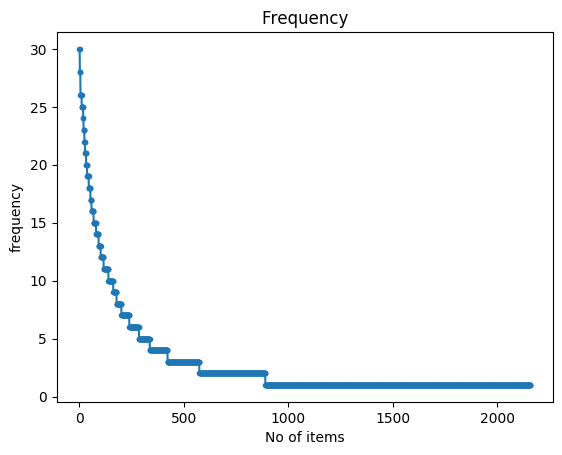

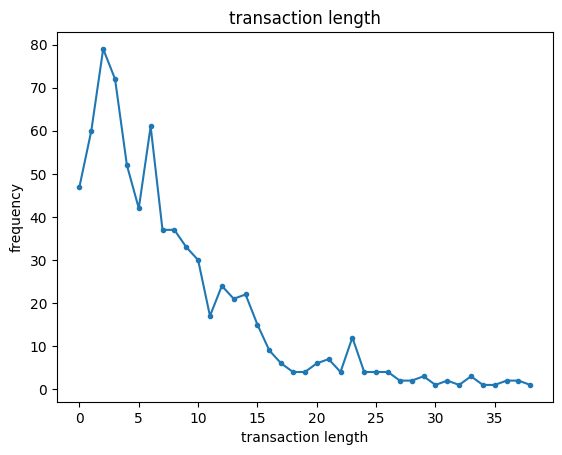

In [172]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.405369127516778
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.966526146738824
Variance in Transaction Sizes : 35.64728296168002
Sparsity : 0.9965636266853979


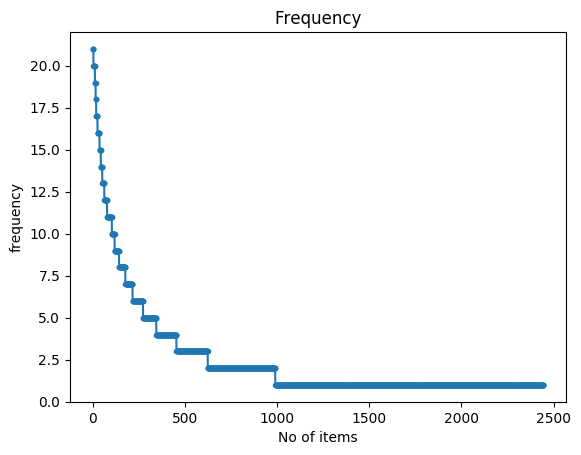

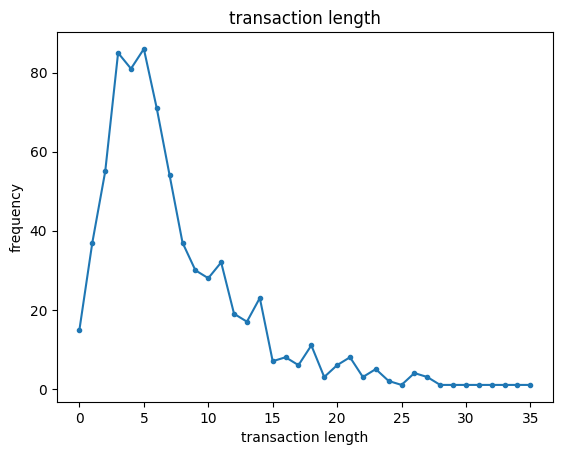

In [173]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [192]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=3
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) 
print('Runtime: ' + str(obj1.getRuntime())) 

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 938
Runtime: 0.01266622543334961


In [193]:
obj1.save('td_freq_db_nostalgia_minSup3.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        forgot        3
1            mr        3
2    appreciate        3
3         death        3
4     death jim        3
..          ...      ...
933        ever       28
934       would       28
935          go       28
936       takes       30
937    favorite       30

[938 rows x 2 columns]

In [194]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=3
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) 
print('Runtime: ' + str(obj2.getRuntime())) 

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 730
Runtime: 0.010515689849853516


In [195]:
obj2.save('td_freq_db_not nostalgia_minSup3.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0       emotional        3
1             fan        3
2              30        3
3        blessing        3
4        december        3
..            ...      ...
725         loved       21
726          them       21
727    them every        4
728        lyrics       21
729  lyrics every        3

[730 rows x 2 columns]

In [196]:
import pandas as pd

dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]

pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
total_patterns_count = sum(len(df) for df in dfs)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")

      Patterns  Support
624      would       28
623       ever       28
620       wish       26
617         or       26
616       such       26
..         ...      ...
16   australia        3
15        disc        3
14   favourite        3
13        army        3
12       plane        3

[1042 rows x 2 columns]
Number of patterns discarded: 626


In [198]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  
terms = count_vect.get_feature_names_out()  

X['tokenized_comment'] = X['comment'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  forgot  \
0      0    0    0   0   0    0    0   0     0   0  ...       0   
1      0    0    0   0   0    0    0   0     0   0  ...       0   
2      0    0    0   0   0    0    0   0     0   0  ...       1   
3      0    0    0   0   0    0    0   0     0   0  ...       0   
4      0    0    0   0   0    0    0   0     0   0  ...       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0   
1499   0    0    0   0   0    0    0   0     0   0  ...       0   

      greatest elvis  back them  over elvis  feel ve  australia  disc  \
0                  0          0           0        0          0     0   
1                  0          0           0        0          0     0   
2                  0          0           0        0          0     0   
3                  0          0           0        0          0     0   
4                  0          0           0        0          0     0   
...              ...        ...         ...      ...        ...   ...   
1495               0          0           0        0          0     0   
1496               0          0           0        0          0     0   
1497               0          0           0        0          0     0   
1498               0          0           0        0          0     0   
1499               0          0           0        0          0     0   

      favourite  army  plane  
0             0     0      0  
1             0     0      0  
2             0     0      0  
3             0     0      0  
4             0     0      0  
...         ...   ...    ...  
1495          0     0      0  
1496          0     0      0  
1497          0     0      0  
1498          0     0      0  
1499          0     0      0  

[1498 rows x 4772 columns]

In [199]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [202]:
X_pca_tdm.shape

(1498, 2)

In [203]:
X_tsne_tdm.shape

(1498, 2)

In [204]:
X_umap_tdm.shape

(1498, 2)

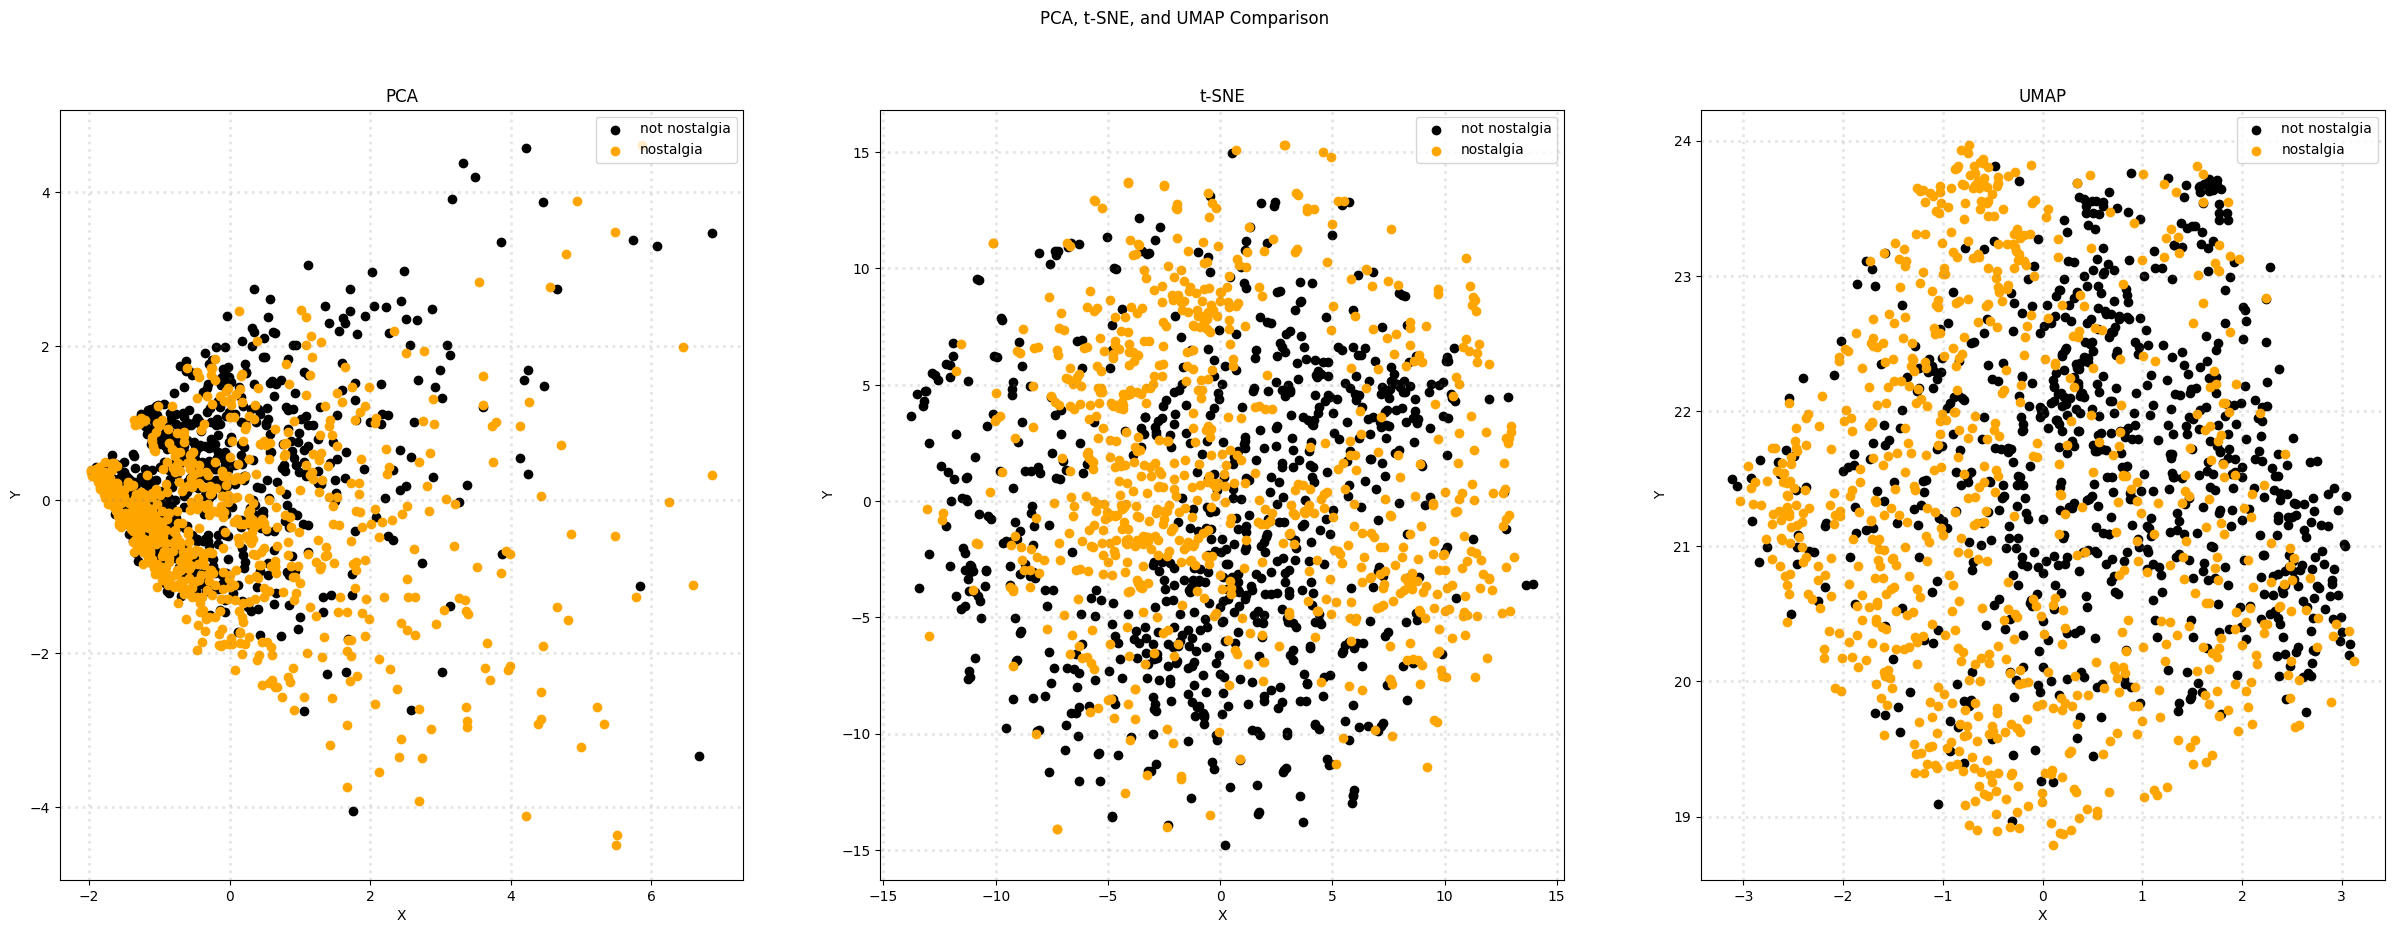

In [207]:
# Plot the results in subplots
col = ['black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [208]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

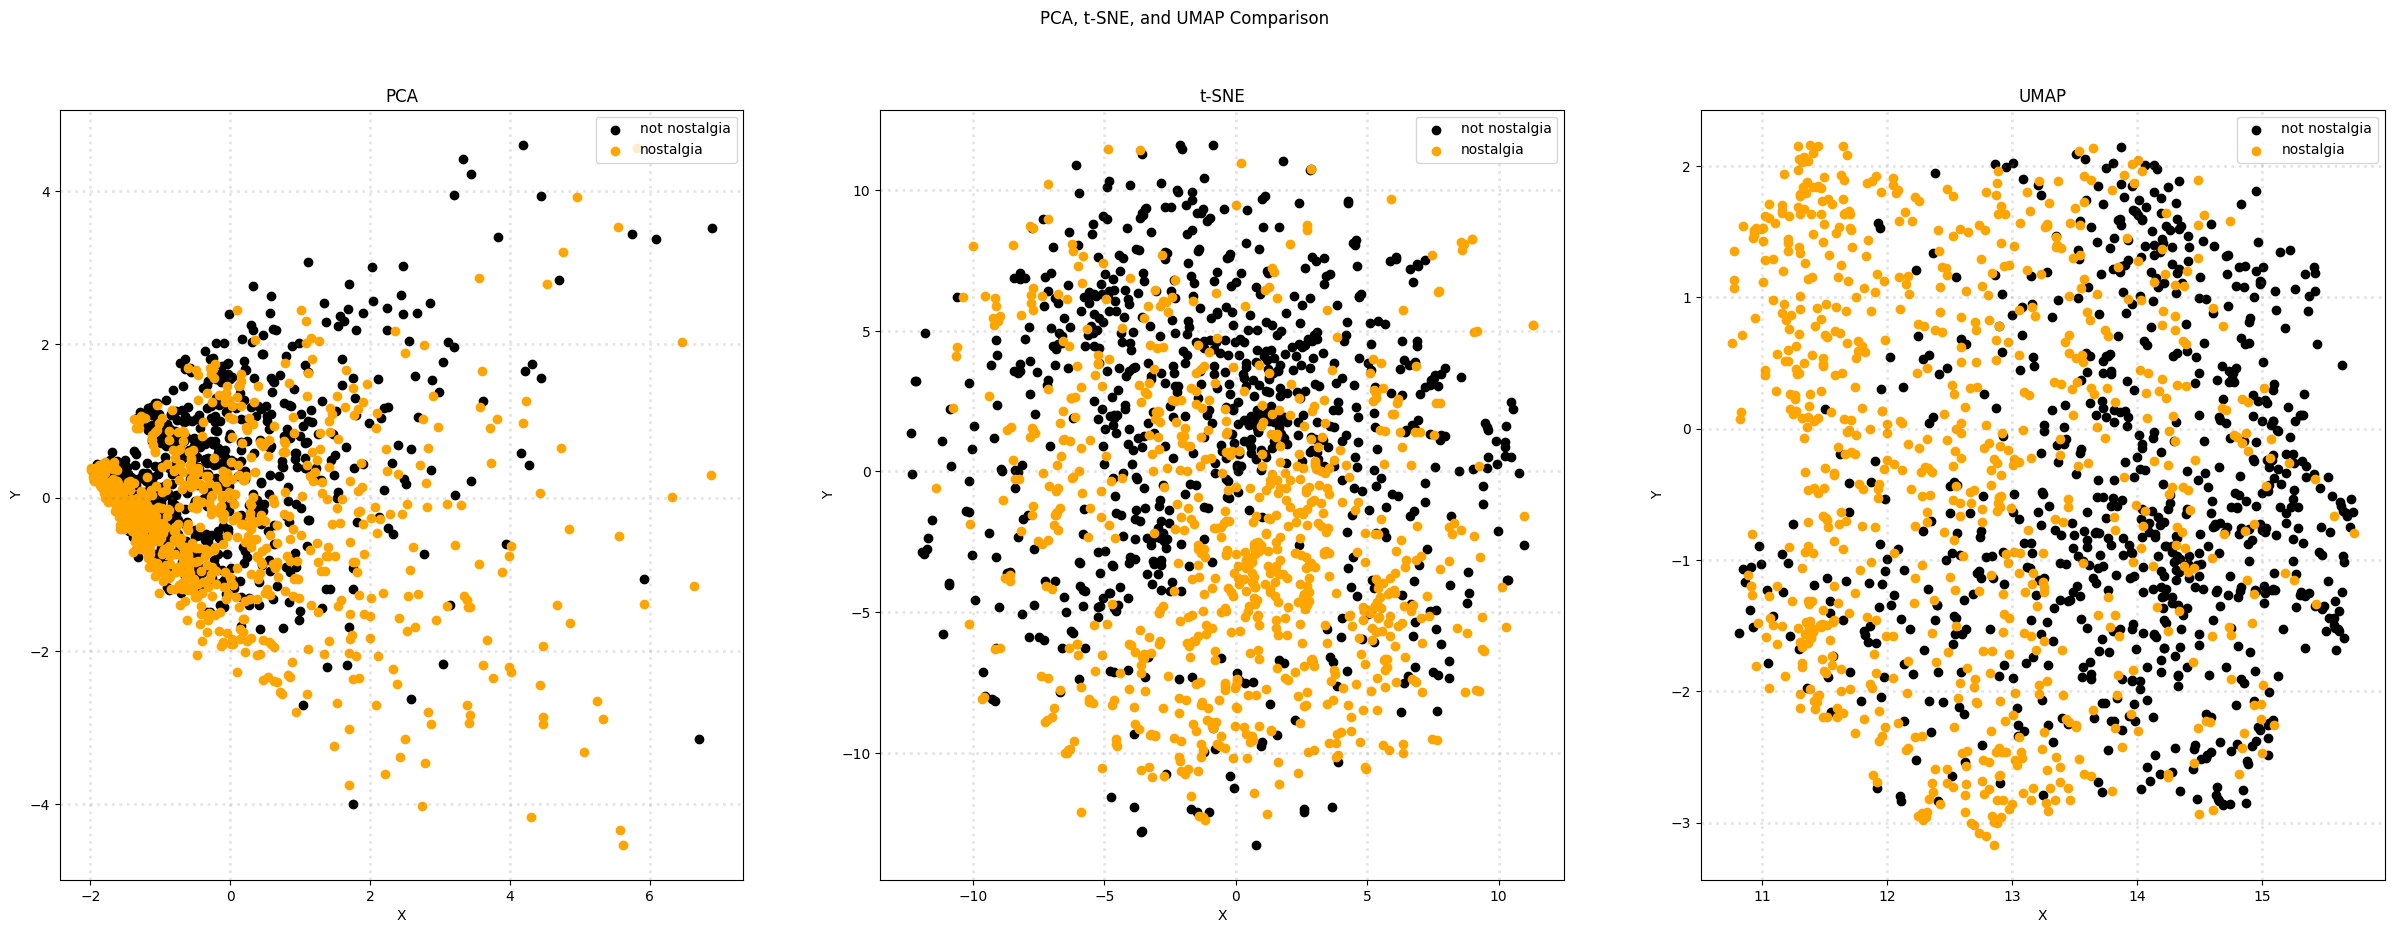

In [209]:
# Plot the results in subplots
col = ['black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [210]:
X_pca_aug_3 = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3 = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3 = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

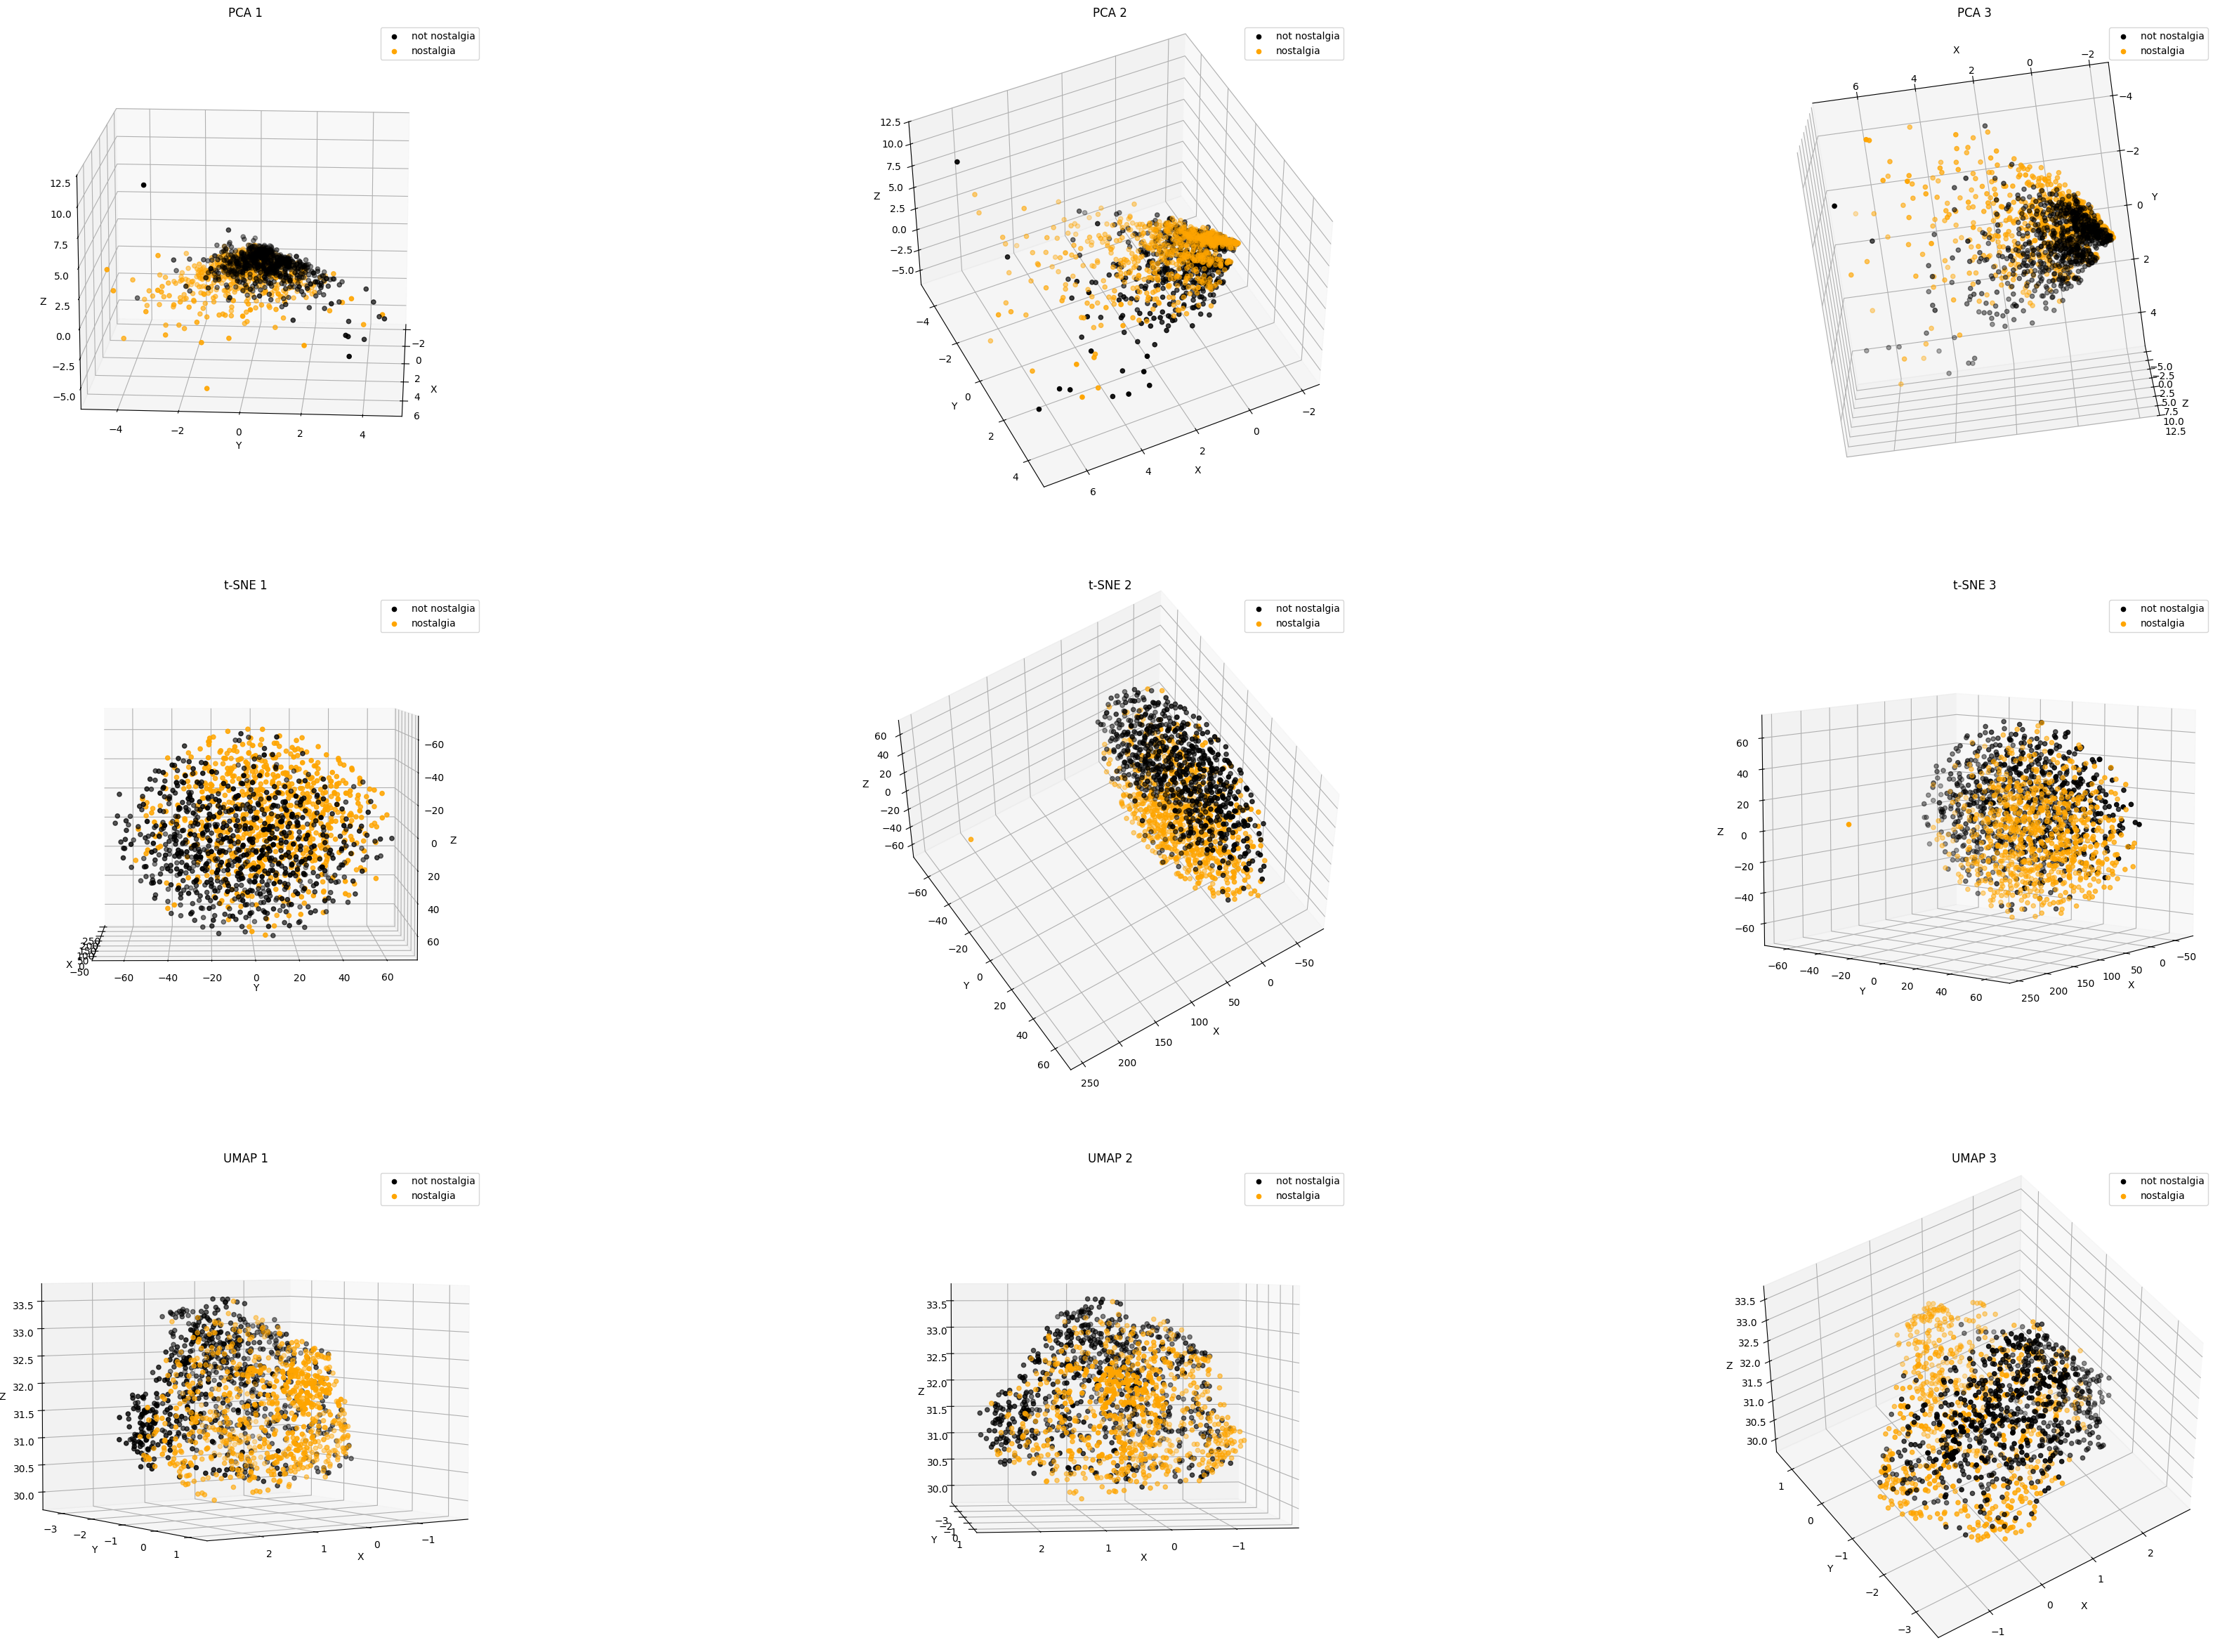

In [211]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


col = ['black', 'orange']
categories = X['sentiment'].unique()


fig = plt.figure(figsize=(45, 30))  

def plot_scatter_3d(ax, X_reduced, title, elev, azim):
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category][:, 0]
        ys = X_reduced[X['sentiment'] == category][:, 1]
        zs = X_reduced[X['sentiment'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    ax.legend(loc='upper right')
    ax.view_init(elev=elev, azim=azim)

# PCA
ax1 = fig.add_subplot(331, projection='3d')
plot_scatter_3d(ax1, X_pca_aug_3, 'PCA 1', elev=15, azim=4)
ax2 = fig.add_subplot(332, projection='3d')
plot_scatter_3d(ax2, X_pca_aug_3, 'PCA 2', elev=45, azim=64)
ax3 = fig.add_subplot(333, projection='3d')
plot_scatter_3d(ax3, X_pca_aug_3, 'PCA 3', elev=105, azim=82)

# t-SNE
ax4 = fig.add_subplot(334, projection='3d')
plot_scatter_3d(ax4, X_tsne_aug_3, 't-SNE 1', elev=184, azim=1)
ax5 = fig.add_subplot(335, projection='3d')
plot_scatter_3d(ax5, X_tsne_aug_3, 't-SNE 2', elev=54, azim=57)
ax6 = fig.add_subplot(336, projection='3d')
plot_scatter_3d(ax6, X_tsne_aug_3, 't-SNE 3', elev=8, azim=38)

# UMAP
ax7 = fig.add_subplot(337, projection='3d')
plot_scatter_3d(ax7, X_umap_aug_3, 'UMAP 1', elev=4, azim=56)
ax8 = fig.add_subplot(338, projection='3d')
plot_scatter_3d(ax8, X_umap_aug_3, 'UMAP 2', elev=3, azim=82)
ax9 = fig.add_subplot(339, projection='3d')
plot_scatter_3d(ax9, X_umap_aug_3, 'UMAP 3', elev=44, azim=236)

plt.show()


In [212]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [213]:
mlb = preprocessing.LabelBinarizer()

In [214]:
mlb.fit(X.category)

LabelBinarizer()

In [215]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [216]:
X[0:9]

comment      sentiment  category  \
0  He was a singer with a golden voice that I lov...  not nostalgia         0   
1  The mist beautiful voice ever I listened to hi...      nostalgia         1   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia         1   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia         0   
4  listening to his songs reminds me of my mum wh...      nostalgia         1   
5  Every time I heard this song as a child, I use...      nostalgia         1   
6  My dad loved listening to Jim Reeves, when I w...      nostalgia         1   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia         1   
8           Wherever you  are you always in my heart  not nostalgia         0   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                   tokenized_comment bin_category  
0  {and, was, all, great, Reeves, feel, you, 16ye...          [0]  
1  {and, was, forgotten, angel, him, I, listened,...          [1]  
2  {and, was, who, sounds, around., graduated, Re...          [1]  
3  {and, who, all, day, you, have, years, in, I, ...          [0]  
4  {songs, who, everyday, played, his, listening,...          [1]  
5  {song., time, RIP, as, I, cry....because, Reev...          [1]  
6  {was, in, do, 70's, how, I, listening, back, R...          [1]  
7  {and, TO, since, music., Reeves, in, LISTENED,...          [1]  
8        {you, heart, my, in, Wherever, are, always}          [0]

In [218]:
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [219]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['I love this song reminds me of the love of my life']
['TURN MY MEMORIES BACK IN 1993, TO LAURA FROM COMO, ITALIA, THANK YOU, THANK YOU, THANK YOU']


In [220]:
from sklearn.preprocessing import binarize

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [221]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.190347
Cosine Similarity using count bw 1 and 3: 0.027379
Cosine Similarity using count bw 2 and 3: 0.047946
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\Lin\AppData\Local\Temp\ipykernel_13616\1433203154.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Lin\AppData\Local\Temp\ipykernel_13616\1433203154.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Lin\AppData\Local\Temp\ipykernel_13616\1433203154.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Lin\AppData\Local\Temp\ipykernel_13616\1433203154.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

In [222]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [223]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1397   0    0    0   0   0    0    0   0     0   0  ...      0         0   
709    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1273   0    0    0   0   0    0    0   0     0   0  ...      0         0   
940    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1132   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1296   0    0    0   0   0    0    0   0     0   0  ...      0         0   
862    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1461   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1128   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
890       0         0        0    0    0    0        0      0  
1397      0         0        0    0    0    0        0      0  
709       0         0        0    0    0    0        0      0  
1273      0         0        0    0    0    0        0      0  
940       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1132      0         0        0    0    0    0        0      0  
1296      0         0        0    0    0    0        0      0  
862       0         0        0    0    0    0        0      0  
1461      0         0        0    0    0    0        0      0  
1128      0         0        0    0    0    0        0      0  

[1048 rows x 3730 columns]

In [224]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1035   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1307   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1437   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1491   0    0    0   0   0    0    0   0     0   0  ...      0         0   
790    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1231   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1275   0    0    0   0   0    0    0   0     0   0  ...      0         0   
484    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1329   0    0    0   0   0    0    0   0     0   0  ...      0         0   
201    0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1035      0         0        0    0    0    0        0      0  
1307      0         0        0    0    0    0        0      0  
1437      0         0        0    0    0    0        0      0  
1491      0         0        0    0    0    0        0      0  
790       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1231      1         0        0    0    0    0        0      0  
1275      0         0        0    0    0    0        0      0  
484       0         0        0    0    0    0        0      0  
1329      0         0        0    0    0    0        0      0  
201       0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [225]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9463    0.8220    0.8798       236
    nostalgia     0.8286    0.9486    0.8845       214

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



In [226]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [227]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  forgot  \
890    0    0    0   0   0    0    0   0     0   0  ...       0   
1397   0    0    0   0   0    0    0   0     0   0  ...       0   
709    0    0    0   0   0    0    0   0     0   0  ...       0   
1273   0    0    0   0   0    0    0   0     0   0  ...       0   
940    0    0    0   0   0    0    0   0     0   0  ...       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...   
1132   0    0    0   0   0    0    0   0     0   0  ...       0   
1296   0    0    0   0   0    0    0   0     0   0  ...       0   
862    0    0    0   0   0    0    0   0     0   0  ...       0   
1461   0    0    0   0   0    0    0   0     0   0  ...       0   
1128   0    0    0   0   0    0    0   0     0   0  ...       0   

      greatest elvis  back them  over elvis  feel ve  australia  disc  \
890                0          0           0        0          0     0   
1397               0          0           0        0          0     0   
709                0          0           0        0          0     0   
1273               0          0           0        0          0     0   
940                0          0           0        0          0     0   
...              ...        ...         ...      ...        ...   ...   
1132               0          0           0        0          0     0   
1296               0          0           0        0          0     0   
862                0          0           0        0          0     0   
1461               0          0           0        0          0     0   
1128               0          0           0        0          0     0   

      favourite  army  plane  
890           0     0      0  
1397          0     0      0  
709           0     0      0  
1273          0     0      0  
940           0     0      0  
...         ...   ...    ...  
1132          0     0      0  
1296          0     0      0  
862           0     0      0  
1461          0     0      0  
1128          0     0      0  

[1048 rows x 4772 columns]

In [228]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  forgot  \
1035   0    0    0   0   0    0    0   0     0   0  ...       0   
1307   0    0    0   0   0    0    0   0     0   0  ...       0   
1437   0    0    0   0   0    0    0   0     0   0  ...       0   
1491   0    0    0   0   0    0    0   0     0   0  ...       0   
790    0    0    0   0   0    0    0   0     0   0  ...       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...   
1231   0    0    0   0   0    0    0   0     0   0  ...       0   
1275   0    0    0   0   0    0    0   0     0   0  ...       0   
484    0    0    0   0   0    0    0   0     0   0  ...       0   
1329   0    0    0   0   0    0    0   0     0   0  ...       0   
201    0    0    0   0   0    0    0   0     0   0  ...       0   

      greatest elvis  back them  over elvis  feel ve  australia  disc  \
1035               0          0           0        0          0     0   
1307               0          0           0        0          0     0   
1437               0          0           0        0          0     0   
1491               0          0           0        0          0     0   
790                0          0           0        0          0     0   
...              ...        ...         ...      ...        ...   ...   
1231               0          0           0        0          0     0   
1275               0          0           0        0          0     0   
484                0          0           0        0          0     0   
1329               0          0           0        0          0     0   
201                0          0           0        0          0     0   

      favourite  army  plane  
1035          0     0      0  
1307          0     0      0  
1437          0     0      0  
1491          0     0      0  
790           0     0      0  
...         ...   ...    ...  
1231          0     0      0  
1275          0     0      0  
484           0     0      0  
1329          0     0      0  
201           0     0      0  

[450 rows x 4772 columns]

In [229]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8955555555555555

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9437    0.8517    0.8953       236
    nostalgia     0.8523    0.9439    0.8958       214

     accuracy                         0.8956       450
    macro avg     0.8980    0.8978    0.8956       450
 weighted avg     0.9002    0.8956    0.8955       450

